In [2]:
import pandas as pd

FILE_PATH='acm.csv'


## Parse TXT file to CSV file

In [122]:
import csv


def yield_file_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield line.strip()

def process_entry(lines):
    entry = {}
    for line in lines:
        if line.startswith('#*'):
            entry['Title'] = line[2:].strip()
        elif line.startswith('#@'):
            entry['Authors'] = line[2:].strip()
        elif line.startswith('#t'):
            entry['Year'] = line[2:].strip()
        elif line.startswith('#c'):
            entry['Venue'] = line[2:].strip()
        elif line.startswith('#index'):
            entry['Index'] = line[6:].strip()
        elif line.startswith('#%'):
            references = entry.get('References', [])
            references.append(line[2:].strip())
            entry['References'] = references
    return entry


def process_large_file(input_path, output_path):
    current_lines = []

    with open(output_path, 'w', newline='') as csvfile:
        fieldnames = ['Title', 'Authors', 'Year', 'Venue', 'Index', 'References']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for line in yield_file_lines(input_path):
            if line.startswith('#*') and current_lines:
                entry = process_entry(current_lines)
                if 'References' in entry:
                    entry['References'] = ', '.join(entry['References'])
                writer.writerow(entry)
                current_lines = []

            current_lines.append(line)

        if current_lines:
            entry = process_entry(current_lines)
            if 'References' in entry:
                entry['References'] = ', '.join(entry['References'])
            writer.writerow(entry)

process_large_file('acm.txt', 'acm.csv')

In [ ]:
def authors_split(authors):
    result = []
    extend = False
    
    for author in authors.split(','):
        author = author.strip()

        if 'Jr.' in author:
            if not result:
                result.append('Jr.')
                extend = True
            else:
                result[-1] += ' Jr.'
        else:
            if extend:
                result[-1] += author
                extend = False
            else:
                result.append(author)
 
    return result

In [ ]:
authors = set()
venues = set()
index = set()
references = set()

df = pd.read_csv(FILE_PATH)

df['Authors'].dropna()


def retrieve_unique_data_by_column(column):
    df = pd.read_csv(FILE_PATH, skiprows=0, nrows=10)
    
    return set(df[column].dropna())

authors = retrieve_unique_data_by_column('Authors')
venues = retrieve_unique_data_by_column('Venue')
index = retrieve_unique_data_by_column('Index')
print(authors)
print(venues)
print(index)
print(len(authors))
print(len(venues))
print(len(index))

# 1658465


{'David Haussler', 'M. Gyssens, J. Paredaens', 'Hans Röck', 'C. C. Chang, M. W. Du, R. C. T. Lee', 'Rene Moreau', 'A. G. Akritas, S. S. Lyengar, A. A. Rampuria', 'Virgil D. Gligor', 'Sushil Jajodia, Peter A. Ng, Frederick N. Springsteel', 'George M. Trojan'}
{'Journal of the ACM (JACM)', 'International Journal of Parallel Programming', 'The computer comes of age', 'Integration, the VLSI Journal', 'Information Sciences: an International Journal'}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
9
5
10


{'A. G. Akritas, S. S. Lyengar, A. A. Rampuria',
 'C. C. Chang, M. W. Du, R. C. T. Lee',
 'David Haussler',
 'George M. Trojan',
 'Hans Röck',
 'M. Gyssens, J. Paredaens',
 'Rene Moreau',
 'Sushil Jajodia, Peter A. Ng, Frederick N. Springsteel',
 'Virgil D. Gligor'}

In [110]:
def retrieve_unique_references():
    df = pd.read_csv(FILE_PATH)
    references = []

    for ref in df['References'].dropna():
        references.extend(ref.split(','))

    return set(references)


references = retrieve_unique_references()
print(len(references))


1181415


In [ ]:
df = pd.read_csv(FILE_PATH)
filtered_df = df[df['Title'].str.contains('Principles and Practice of Knowledge Discovery in Databases', na=False, case=False)]

venues = filtered_df['Venue'].dropna().unique()

for venue in venues:
    print(venue + '\n')



Unique venues for conference: Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases



## Since one conference has multiple different venue names, which indiacates the numbers of unique publications are not accurate.


## The venues have slightly different names 

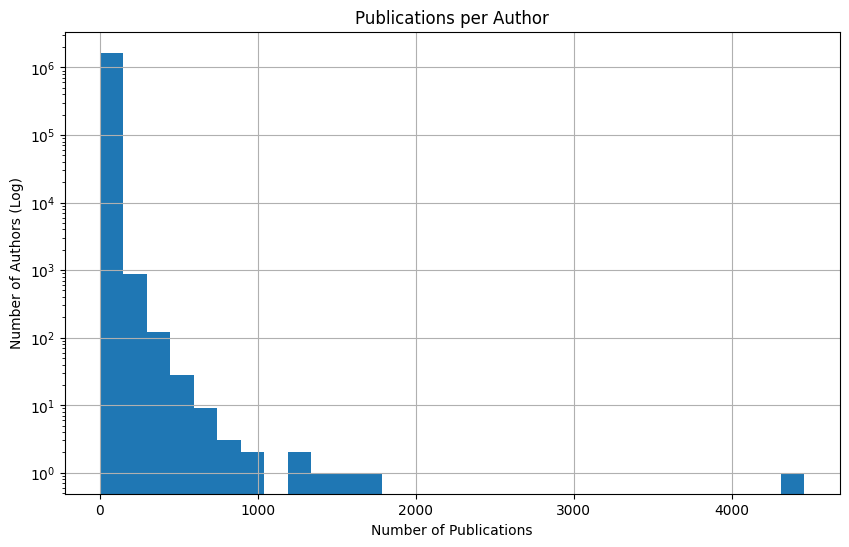

In [ ]:
import matplotlib.pyplot as plt


def plot_histogram_number_of_publications_per_authors():
    df = pd.read_csv(FILE_PATH)
    
    authors_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['Authors']) and pd.notna(row['Title']):
            authors = authors_split(row['Authors'])
            title = row['Title']
            for author in authors:
                author = author.strip()
                if author in authors_map:
                    authors_map[author].append(title)
                else:
                    authors_map[author] = [title]

    publication_counts = [len(publications) for publications in authors_map.values()]

    plt.figure(figsize=(10, 6))
    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Number of Publications')
    plt.ylabel('Number of Authors (Log)')
    plt.title('Publications per Author')
    plt.grid(True)
    plt.show()

    return publication_counts


publication_counts = plot_histogram_number_of_publications_per_authors()

#j shawn, julie
#j _ , _ , _ 

# authors = '_ ,_ ,_'
# authors = '_ ,_'

In [ ]:
import numpy as np

print("Mean -",np.mean(publication_counts))
print("Standard Deviation -",np.std(publication_counts))
print("Q1 - ",np.percentile(publication_counts,25))
print("Median - ",np.percentile(publication_counts,50))
print("Q3 - ",np.percentile(publication_counts,75))

Mean - 3.454151137463698
Standard Deviation - 10.738156357011746
Q1 -  1.0
Median -  1.0
Q3-  3.0


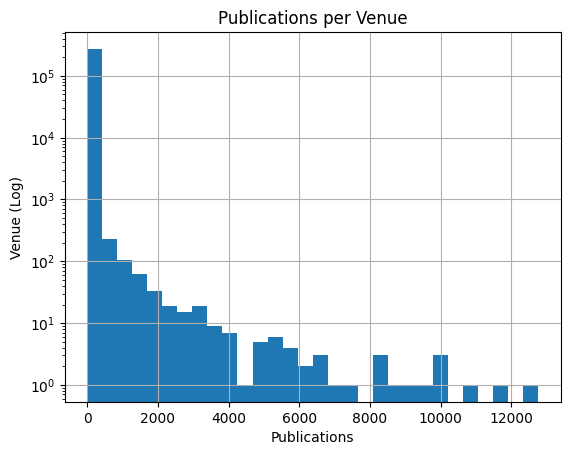

In [128]:

def plot_histogram_number_of_publications_per_venue():
    df = pd.read_csv(FILE_PATH)
    
    venue_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['Venue']) and pd.notna(row['Title']):
            venue = row['Venue']
            title = row['Title']

            if venue in venue_map:
                venue_map[venue] += 1
            else:
                venue_map[venue] = 1

    publication_counts = [counts for counts in venue_map.values()]

    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Publications')
    plt.ylabel('Venue (Log)')
    plt.title('Publications per Venue')
    plt.grid(True)
    plt.show()

    return publication_counts

publication_counts = plot_histogram_number_of_publications_per_venue()

In [129]:

print("Mean -", np.mean(publication_counts))
print("Standard Deviation -", np.std(publication_counts))
print("Q1 - ", np.percentile(publication_counts,25))
print("Median - ", np.percentile(publication_counts,50))
print("Q3 - ", np.percentile(publication_counts,75))

Mean - 8.725348299479014
Standard Deviation - 106.78868370244105
Q1 -  1.0
Median -  1.0
Q3 -  1.0


In [156]:
title_map = {}
df = pd.read_csv(FILE_PATH)

for i, row in df.iterrows():
    index = row['Index']
    title = row['Title']
    title_map[index] = title

In [159]:
# print(title_map['2135000'])
for i, (index, title) in enumerate(title_map.items()):
    print(f"Index: {index}, Title: {title}")
    if i >= 4:  # Adjust the number to print more or fewer items
        break


Index: 1, Title: MOSFET table look-up models for circuit simulation
Index: 2, Title: The verification of the protection mechanisms of high-level language machines
Index: 3, Title: Another view of functional and multivalued dependencies in the relational database model
Index: 4, Title: Entity-relationship diagrams which are in BCNF
Index: 5, Title: The computer comes of age


809 2015217


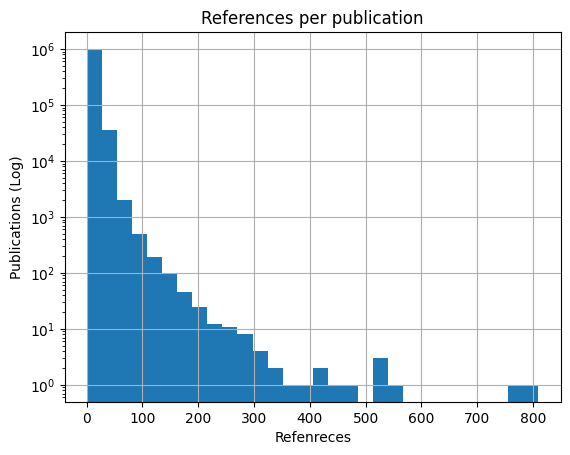

In [ ]:

def plot_histogram_number_of_references_per_publication():
    df = pd.read_csv(FILE_PATH)
    
    references_map = {}
    title_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['References']) and pd.notna(row['Index']):
            references = row['References']
            index = row['Index']
            title = row['Title']
            
            number_of_references = len(references.split(','))
            
            if index in references_map:
                references_map[index] += number_of_references
            else:
                references_map[index] = number_of_references
                title_map[index] = title

    max_citation_index = max(references_map, key=references_map.get)
    max_citation_count = references_map[max_citation_index]
    max_citation_title = title_map[max_citation_index]

    print(max_citation_count, max_citation_index, max_citation_title)

    publication_counts = [counts for counts in references_map.values()]

    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Refenreces')
    plt.ylabel('Publications (Log)')
    plt.title('References per publication')
    plt.grid(True)
    plt.show()

    return publication_counts

publication_counts = plot_histogram_number_of_references_per_publication()

938039 2135000


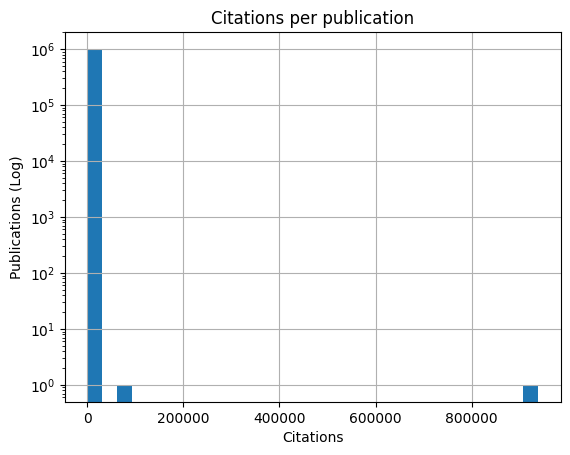

In [161]:

def plot_histogram_number_of_citations_per_publication():
    df = pd.read_csv(FILE_PATH)
    
    citations_map = {}

    for i, row in df.iterrows():
        if pd.notna(row['References']) and pd.notna(row['Index']):
            references = row['References'].strip()   
            citations = references.split(',')

            for citation in citations:
                citation = citation.strip()
                if citation in citations_map:
                    citations_map[citation] += 1
                else:
                    citations_map[citation] = 1

    max_citation_index = max(citations_map, key=citations_map.get)
    max_citation_count = citations_map[max_citation_index]

    print(max_citation_count, max_citation_index)

    publication_counts = [counts for counts in citations_map.values()]

    plt.hist(publication_counts, bins=30, log=True)
    plt.xlabel('Citations')
    plt.ylabel('Publications (Log)')
    plt.title('Citations per publication')
    plt.grid(True)
    plt.show()

    return publication_counts

publication_counts = plot_histogram_number_of_citations_per_publication()

In [138]:
print("Mean -", np.mean(publication_counts))
print("Standard Deviation -", np.std(publication_counts))
print("Q1 - ", np.percentile(publication_counts,25))
print("Median - ", np.percentile(publication_counts,50))
print("Q3 - ", np.percentile(publication_counts,75))

Mean - 8.186702386544948
Standard Deviation - 780.488192515437
Q1 -  1.0
Median -  2.0
Q3 -  6.0


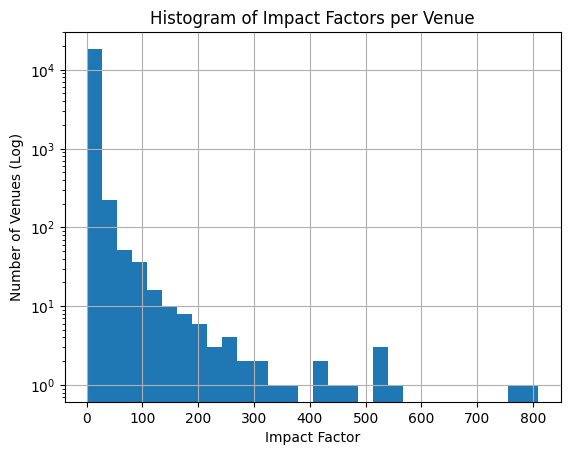

Venue with highest impact factor: ACM SIGOPS 24th Symposium on Operating Systems Principles, Impact Factor: 809.0
